In [ ]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.models import Sequential
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import asarray
from numpy import zeros
from sklearn.model_selection import cross_val_score
from tensorflow.keras import layers
from tensorflow.keras import activations
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.manifold import TSNE 
from matplotlib import pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
tweet_data = pd.read_csv(r"/content/drive/MyDrive/TWEET ABUSE DATA/Train_Data.csv")
tweet_test_data = pd.read_csv(r"/content/drive/MyDrive/TWEET ABUSE DATA/Test_Data.csv")

In [ ]:
tweet_test_data.head(15)

,tweet
0,thank you cadre we must remove any and all bar...
1,sweden is now operating a fleet of ambulances ...
2,how do working hours and job strain relate to ...
3,end panic you can have a future free of
4,our team understand that mental health workers...
5,even tho this is a very real time you can not ...
6,n landcouncil if you are at risk or experienci...
7,still waiting and still no answers from my “re...
8,it’s been a ‘step back day’ today to recharge ...
9,when my friends first saw my family together t...


In [ ]:
tweet_data["label"].replace({1: 0, 2: 1,3: 2}, inplace=True)
tweet_data.head(35)

,tweet,label
0,start your day w your daily here,2
1,even a perfect life doesn’t feel perfect in so...,2
2,great ready for next week s q amp a with white...,2
3,5 ways to protect your mental health during th...,2
4,i m officially an occupational therapist passe...,2
5,not good enough this is all,2
6,so the new season of dropped today and despite...,2
7,today is a good day to spread some love and se...,2
8,have seen quite a few tweets recently with peo...,2
9,i’m running 144 4 miles over 20 days for to ra...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2    2165
1     124
0      61
Name: label, dtype: int64

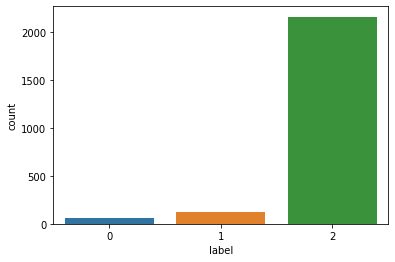

In [ ]:
sns.countplot(tweet_data.label)
tweet_data.label.value_counts()

In [ ]:
tweet_data.groupby('label').size() 


label
0      61
1     124
2    2165
dtype: int64

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
def text_transformation(df_col):
    corpus = []
    stop_words = set(stopwords.words('english'))
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in stop_words ]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
corpus = text_transformation(tweet_data['tweet'])

In [ ]:
processed_tweets = pd.DataFrame (corpus, columns = ['processed_tweets'])
processed_tweets.head(15)

,processed_tweets
0,start day w daily
1,even perfect life feel perfect much pain right...
2,great ready next week q amp whitey talk panel ...
3,way protect mental health time link bio atlant...
4,officially occupational therapist passed degre...
5,good enough
6,new season dropped today despite hard watch st...
7,today good day spread love sending love great ...
8,seen quite tweet recently people saying feel l...
9,running mile day raise money living hiv need m...


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=1)
traindata = vectorizer.fit_transform(corpus).toarray()
X = traindata
y = tweet_data.label
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'start': 22014, 'day': 5447, 'daily': 5329, 'start day': 22022, 'day daily': 5464, 'even': 7404, 'perfect': 17317, 'life': 13186, 'feel': 8151, 'much': 15263, 'pain': 16801, 'right': 19951, 'med': 14524, 'hope': 10917, 'get': 9149, 'better': 2502, 'soon': 21698, 'worst': 26678, 'headache': 10194, 'wait': 25610, 'go': 9375, 'bed': 2339, 'know': 12589, 'hurt': 11158, 'even perfect': 7421, 'perfect life': 17319, 'life feel': 13213, 'feel perfect': 8190, 'perfect much': 17321, 'much pain': 15298, 'pain right': 16807, 'right med': 19971, 'med hope': 14528, 'hope get': 10930, 'get better': 9161, 'better soon': 2529, 'soon worst': 21704, 'worst headache': 26682, 'headache wait': 10196, 'wait go': 25613, 'go bed': 9382, 'bed know': 2341, 'know hurt': 12624, 'great': 9685, 'ready': 19100, 'next': 15907, 'week': 25971, 'amp': 992, 'whitey': 26193, 'talk': 23201, 'panel': 16863, 'expert': 7778, 'broker': 3035, 'around': 1660, 'country': 4945, 'register': 19413, 'great ready': 9724, 

In [ ]:
vocabulary_size = 200000
t_training=tf.keras.preprocessing.text.Tokenizer(num_words=vocabulary_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)
t = tf.keras.preprocessing.text.Tokenizer(num_words=vocabulary_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)

In [ ]:
t.fit_on_texts(corpus)
vocab_size_training = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(corpus)
print(encoded_docs)    

[[106, 12, 123, 370], [124, 453, 17, 26, 453, 40, 454, 60, 504, 130, 13, 56, 371, 629, 1862, 505, 57, 630, 5, 18, 396], [28, 397, 107, 30, 825, 1, 2727, 35, 1158, 631, 2728, 111, 191, 277], [22, 214, 2, 3, 8, 159, 506, 2729, 1863], [1864, 979, 215, 2730, 1159, 192, 1865, 160, 979, 125, 228, 30, 455, 1426, 1160, 2, 3, 980], [24, 398], [25, 1427, 2731, 16, 1161, 193, 146, 101, 124, 632, 2732, 2733, 456, 716, 288, 16, 2734, 1162, 1866], [16, 24, 12, 981, 44, 1428, 44, 28, 2, 3], [564, 717, 457, 633, 7, 982, 26, 458, 161, 565, 67, 48, 1163, 1867, 8, 60, 4, 2735, 372, 9], [634, 399, 12, 289, 422, 216, 2736, 6, 2, 3, 9, 423, 459, 16, 399, 171, 57, 172, 126, 1, 1164], [566, 400, 61, 137, 22, 4, 7, 56, 131, 23, 1868, 17], [373, 93, 2, 3, 566, 1160, 304, 1429, 983, 202, 983, 507, 62, 121, 373, 162], [80, 718, 2737, 86, 826, 827, 1430, 2738, 2739, 984, 132, 80], [567, 140, 338, 6, 4, 508, 828, 228, 229, 829, 259, 113, 509, 510, 215, 260, 6, 40, 9], [1165, 1869, 339, 17, 29, 45, 11, 261], [16, 14

In [ ]:
print("The word index",t.word_index)

The word index {'amp': 1, 'mental': 2, 'health': 3, 'help': 4, 'u': 5, 'need': 6, 'people': 7, 'time': 8, 'support': 9, 'take': 10, 'one': 11, 'day': 12, 'get': 13, 'care': 14, 'please': 15, 'today': 16, 'life': 17, 'know': 18, 'like': 19, 'important': 20, 'make': 21, 'way': 22, 'many': 23, 'good': 24, 'new': 25, 'feel': 26, 'anxiety': 27, 'great': 28, 'want': 29, 'week': 30, 'child': 31, 'work': 32, 'woman': 33, 'join': 34, 'talk': 35, 'issue': 36, 'free': 37, 'via': 38, 'see': 39, 'much': 40, 'well': 41, 'thing': 42, 'check': 43, 'love': 44, 'live': 45, 'find': 46, 'call': 47, 'going': 48, 'service': 49, 'year': 50, 'community': 51, 'self': 52, 'thought': 53, 'others': 54, 'read': 55, 'better': 56, 'go': 57, 'let': 58, 'learn': 59, 'right': 60, 'family': 61, 'june': 62, 'black': 63, 'pandemic': 64, 'someone': 65, 'look': 66, 'think': 67, 'really': 68, 'impact': 69, 'mind': 70, 'feeling': 71, 'may': 72, 'thank': 73, 'stress': 74, 'would': 75, 'book': 76, 'social': 77, 'keep': 78, 'cov

In [ ]:
embeddings_index = dict()
path = "/content/drive/MyDrive/ABR/glove.6B.200d.txt"
f = open(path)
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
print(vocab_size_training)

5708


In [ ]:
embedding_matrix_training = zeros((vocab_size_training, 200))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix_training[i] = embedding_vector

In [ ]:
print(embedding_matrix_training[5])

[-0.10108     0.019587   -0.088978    0.13970999 -0.019511   -0.54253
 -0.36000001  0.51885003 -1.04110003 -0.081929    0.053379   -0.18276
  0.14217     0.17732     0.47361001 -0.45344999 -0.057644    0.065933
  0.15486    -0.22645999  0.35657999  1.4677      0.20055    -0.23645
  0.51590002  0.053886    0.29497001  0.25733     0.0079551   0.75046998
  0.096173   -0.53249002 -0.33864999 -0.47152001  0.65715998 -0.24879999
 -0.17362    -0.0026744  -0.13348     0.40610999 -0.69581997  0.88094997
  0.25459     0.69474    -0.70415998  0.13082001 -0.13495    -0.26925999
 -0.20697001 -0.57170999  0.58989    -0.2423      0.048737    0.10767
  0.51512003 -0.11251    -0.55144     0.12315     0.42728999  0.64232999
  0.50721002 -0.28481001  0.17290001  0.44152001 -0.49498001 -0.76837999
 -0.22028001 -0.12051     1.07159996  0.066308    0.86620998  0.0483
  0.24860001 -1.13310003  0.18298     0.023311    0.21239001 -0.18422
 -0.66351998  0.30168     0.23108    -0.29745999 -0.16122     0.77209002

In [ ]:
model = Sequential()

In [ ]:
def longest(lst):
   longestList = []
   maxLength = max(len(x) for x in listA)
   for i in listA:
      if len(i) == maxLength :
         longestList = i
   return longestList, maxLength
# Driver Code
listA = encoded_docs
print("Longest List and its length in TRAINING DATASET:\n",longest(listA))

Longest List and its length in TRAINING DATASET:
 ([3774, 3775, 1, 1084, 305, 1632, 326, 123, 2354, 181, 1383, 106, 894, 204, 1, 3776, 3777, 1136, 1688, 274, 665, 11, 123, 1731, 3778, 633, 3779, 123, 3780, 623, 3781, 1, 3782, 2288], 34)


In [ ]:
max_length_training = 34
training_paded_data= pad_sequences(encoded_docs, maxlen=max_length_training, padding='post')
print(training_paded_data)  # Returns :- Numpy array with shape (len(sequences), maxlen)

[[ 106   12  123 ...    0    0    0]
 [ 124  453   17 ...    0    0    0]
 [  28  397  107 ...    0    0    0]
 ...
 [ 984  483   34 ...    0    0    0]
 [1159   71   71 ...    0    0    0]
 [1416  217    1 ...    0    0    0]]


In [ ]:
max_length = 34
#The embedding layer maps the words to their embedding vectors from the embedding matrix.
# We can keep this layer as trainable, which will learn the word embedding itself but as we are using GloVe Embeddings, we won’t keep the layer as trainable.
loss_fn = tf.keras.losses.MeanSquaredError()
embedding_model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size_training, output_dim=200, input_length=34, weights = [embedding_matrix_training], trainable=False)
embedding_model.add(embedding_layer)
embedding_model.compile(optimizer='adam', loss='loss_fn', metrics=['mse'])
 #In Keras, the LSTM units attribute specifies the dimensionality of the layer OUTPUT
embedding_encoded_tweets_training_2350_34_200 = embedding_model.predict(training_paded_data)
print(embedding_encoded_tweets_training_2350_34_200)


[[[-0.32248    0.30604   -0.52439   ...  0.015281  -0.042533  -0.043012 ]
  [ 0.1952     0.72545   -0.10055   ... -0.13125   -0.097244  -0.11551  ]
  [-0.20966    0.56893   -0.30036   ...  0.80869    0.34116    0.37644  ]
  ...
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]]

 [[ 0.44802    0.16025   -0.23372   ...  0.15736   -0.13639   -0.030586 ]
  [ 0.63119    0.11457   -0.24715   ...  0.40066   -0.4079     0.066267 ]
  [ 0.34098    0.41888   -0.31878   ...  0.72919    0.38914    0.37687  ]
  ...
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]]

 [[ 0.52559    0.13313   -0.25822   ...  0.41602    0.18878    0.25919  ]
  [ 0.54919    0.51032

In [ ]:
print(training_paded_data.shape)  

(2350, 34)


In [ ]:
X = embedding_encoded_tweets_training_2350_34_200
Y = tweet_data.label
counter = Counter(Y)
print(counter)

Counter({2: 2165, 1: 124, 0: 61})


In [ ]:
X = X.reshape(2350, -1)
X.shape

(2350, 6800)

In [ ]:
strategy = {0:800, 1:1300, 2:2165}
oversample = SMOTETomek(sampling_strategy=strategy)
X_oversampled, Y_oversampled = oversample.fit_resample(X,Y)
counter = Counter(Y_oversampled )
print(counter)
#X_oversampled.reshape(4263,34,200)
X_oversampled.shape

Counter({2: 2163, 1: 1298, 0: 800})


(4261, 6800)

In [ ]:
Y_oversampled_dataframe = pd.DataFrame(Y_oversampled)
Y_oversampled_numpy = Y_oversampled.to_numpy()
Y_oversampled_numpy

#You can use sklearn.preprocessing.LabelBinarizer:

#Example:
label_binarizer = sklearn.preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(Y_oversampled_numpy)+1))
y_oversampled_training = label_binarizer.transform(Y_oversampled_numpy)
#print(format(b))
y_oversampled_training

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
X_oversampled_training = np.reshape(X_oversampled,(4261,34,200))
X_oversampled_training.shape

(4261, 34, 200)

In [ ]:
X_oversampled_reshaped = X_oversampled.reshape(4261,-1)
X_oversampled_reshaped.shape

(4261, 6800)

In [ ]:
print("Before oversampling{}".format(Counter(Y)))
print("After oversampling{}".format(Counter(Y_oversampled)))

Before oversamplingCounter({2: 2165, 1: 124, 0: 61})
After oversamplingCounter({2: 2163, 1: 1298, 0: 800})


In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res_before = tsne.fit_transform(X)
tsne_res_after = tsne.fit_transform(X_oversampled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


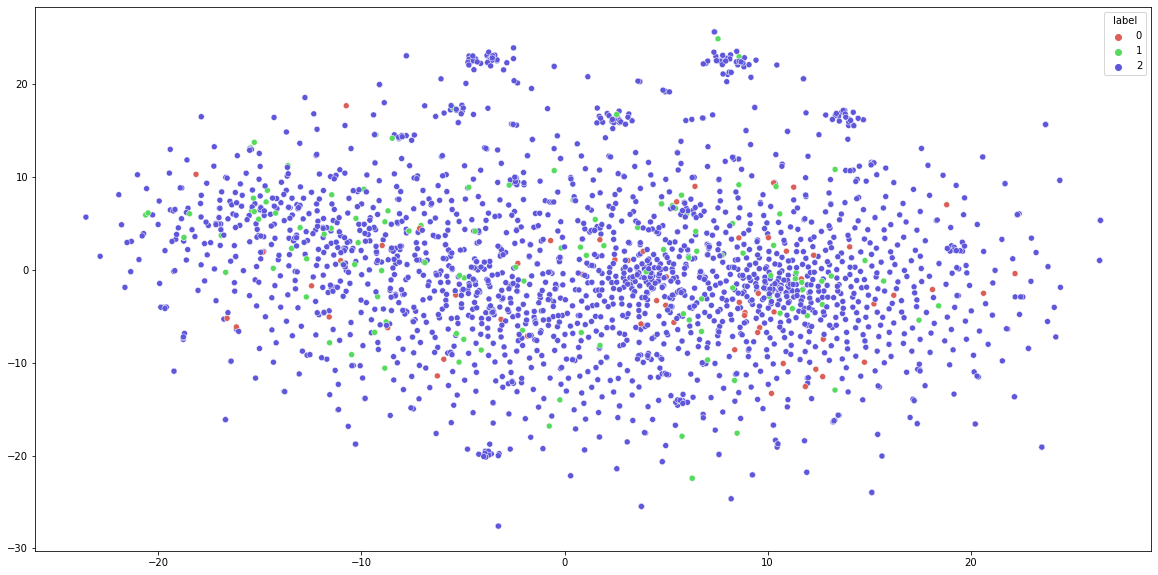

In [ ]:
#tsne_res = tsne.fit_transform(X_oversampled)
Y_oversampled = pd.DataFrame(Y_oversampled)
plt.figure(figsize=(20,10))
#sns.scatterplot(x = tsne_res_after[:,0], y = tsne_res_after[:,1], hue = Y_oversampled.label, palette = sns.hls_palette(3), legend = 'full');
sns.scatterplot(x = tsne_res_before[:,0], y = tsne_res_before[:,1], hue = tweet_data.label, palette = sns.hls_palette(3), legend = 'full');

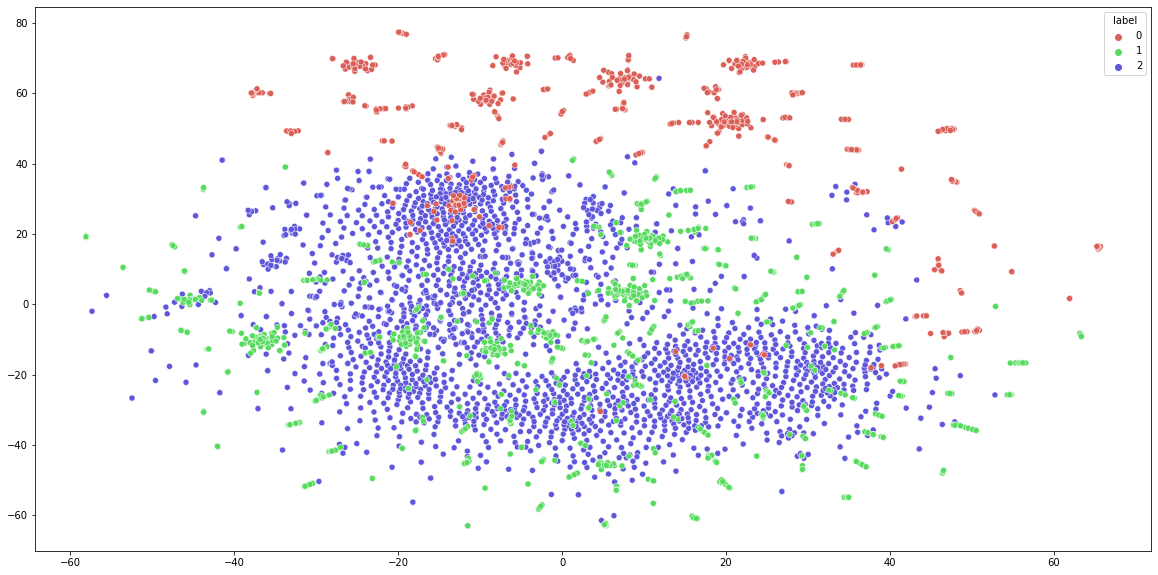

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = tsne_res_after[:,0], y = tsne_res_after[:,1], hue = Y_oversampled.label, palette = sns.hls_palette(3), legend = 'full');

In [ ]:
#def baseline_model():
lstm_model = Sequential()
lstm_model.add(LSTM(units =128, return_sequences = True, input_shape = (34,200)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 128, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 3,activation='softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
lstm_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#return lstm_model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_training,y_oversampled_training, test_size=0.20, random_state=1)
#sns.countplot(pd.DataFrame(y_train))
pd.DataFrame(y_train).value_counts()
pd.DataFrame(y_test).value_counts()
y_test.shape

(853, 3)

In [ ]:
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=64)

Epoch 1/60
54/54 [==============================] - 29s 379ms/step - loss: 1.0218 - accuracy: 0.5112 - val_loss: 0.9679 - val_accuracy: 0.5100
Epoch 2/60
54/54 [==============================] - 16s 297ms/step - loss: 0.8449 - accuracy: 0.6089 - val_loss: 0.8062 - val_accuracy: 0.6166
Epoch 3/60
54/54 [==============================] - 16s 288ms/step - loss: 0.7267 - accuracy: 0.6805 - val_loss: 0.7044 - val_accuracy: 0.7175
Epoch 4/60
54/54 [==============================] - 17s 310ms/step - loss: 0.6285 - accuracy: 0.7462 - val_loss: 0.6157 - val_accuracy: 0.7702
Epoch 5/60
54/54 [==============================] - 17s 322ms/step - loss: 0.5189 - accuracy: 0.8116 - val_loss: 0.5323 - val_accuracy: 0.8066
Epoch 6/60
54/54 [==============================] - 18s 338ms/step - loss: 0.4336 - accuracy: 0.8465 - val_loss: 0.4976 - val_accuracy: 0.8159
Epoch 7/60
54/54 [==============================] - 18s 330ms/step - loss: 0.3639 - accuracy: 0.8747 - val_loss: 0.4446 - val_accuracy: 0.8558

In [ ]:
vocabulary_size = 200000
t_testing = tf.keras.preprocessing.text.Tokenizer(num_words=vocabulary_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)
lm = WordNetLemmatizer()
corpus_test = text_transformation(tweet_test_data['tweet'])
t_testing.fit_on_texts(corpus_test)
vocab_size_testing = len(t_testing.word_index) + 1
encoded_docs_test = t_testing.texts_to_sequences(corpus_test)
print(encoded_docs_test)

[[30, 1303, 121, 344, 809, 279, 111, 188, 345, 1304, 37], [1305, 810, 811, 1306, 1307, 1308, 2, 3, 420, 1309, 346, 1310, 812, 811, 1311, 47, 1312, 1313, 421, 146], [122, 189, 92, 813, 1314, 2, 3, 1315, 422, 147, 1316, 814, 25, 280, 815, 816, 2, 3, 1317, 1318, 122, 189, 423, 123, 281, 190, 424, 92], [112, 817, 425, 19], [98, 164, 2, 3, 147, 818, 589, 590, 148, 426, 819, 589, 427, 37, 1319, 1320, 191, 12, 92, 192], [99, 820, 347, 8, 11, 1321, 100, 1322, 591, 47, 124, 592, 348, 47, 1323, 25, 193, 428, 9, 282, 821, 52, 1324, 8], [593, 1325, 283, 284, 64, 285, 594, 5, 64, 125, 38, 1326, 822, 67, 595, 349, 19, 1, 596, 5, 823], [64, 824, 64, 597, 1327, 149, 17, 150, 42, 598, 194, 43, 233, 101, 350, 286], [429, 68, 9, 12, 825, 1, 1328, 430, 83, 1329, 20, 599, 826, 33, 827, 1330, 1331, 1, 600, 431, 14, 1332, 1333, 126], [53, 136, 828, 84, 69, 1334], [1335, 1336, 351, 352, 601, 829, 1337, 1338, 287, 27, 39, 4, 830, 353], [137, 602, 831, 603, 234, 165, 23, 93, 69, 195, 604], [151, 1339, 1340, 235

In [ ]:
vocab_size_testing = len(t_testing.word_index) + 1
print(vocab_size_testing)

3094


In [ ]:
embedding_matrix_testing = zeros((vocab_size_testing, 200))
for word, i in t_testing.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix_testing[i] = embedding_vector

In [ ]:
#TEST DATA PREPROCESSING AND TESTING
max_length = 34
#print(encoded_docs) 
#print("The word index",t_testing.word_index) 
embedding_matrix = zeros((vocab_size_testing, 200))
for word, i in t_testing.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector 

testing_paded_data = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
print(testing_paded_data)  # Returns :- Numpy array with shape (len(sequences), maxlen)

[[  30 1303  121 ...    0    0    0]
 [1305  810  811 ...    0    0    0]
 [ 122  189   92 ...    0    0    0]
 ...
 [  66   86   41 ...    0    0    0]
 [   2    3 3092 ...    0    0    0]
 [  55   36  105 ...    0    0    0]]


In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
embedding_model_testing = Sequential()
embedding_layer_testing = Embedding(input_dim=vocab_size_testing, output_dim=200, input_length=34, weights = [embedding_matrix_testing], trainable=False)
embedding_model_testing.add(embedding_layer)
embedding_model_testing.compile(optimizer='adam', loss='loss_fn', metrics=['mse'])
 #In Keras, the LSTM units attribute specifies the dimensionality of the layer OUTPUT
embedding_encoded_testing_tweets_784_34_200 = embedding_model_testing.predict(testing_paded_data)
print(embedding_encoded_testing_tweets_784_34_200.shape)
testing_dataset = embedding_encoded_testing_tweets_784_34_200

(784, 34, 200)


In [ ]:
testing_dataset

array([[[-0.28622  ,  0.61687  , -0.42819  , ..., -0.049013 ,
          0.040753 ,  0.057147 ],
        [-0.34636  , -0.88984  , -0.50321  , ...,  0.085964 ,
          0.48077  , -0.13097  ],
        [-0.086255 ,  0.89105  ,  0.20147  , ..., -0.1841   ,
         -0.5971   ,  0.17212  ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 0.26363  , -0.5576   ,  0.11568  , ...,  0.10918  ,
         -1.0371   ,  0.22373  ],
        [-0.73804  ,  0.33874  , -0.4988   , ...,  0.09156  ,
         -0.29553  ,  0.7458   ],
        [-0.31001  ,  0.041393 , -0.68494  , ..., -0.40289  ,
         -1.0649   , -0.036135 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.

In [ ]:
predictions = lstm_model.predict(embedding_encoded_testing_tweets_784_34_200)
predict_class = np.argmax(predictions, axis=1)
print(predict_class)

[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 0 2 2 2 1 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 1 0 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 1 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 2 1 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 

In [ ]:
submissions= pd.DataFrame()
submissions['id'] =tweet_test_data.index
submissions['label'] =predict_class
#submissions.to_csv(r"D:\KAGGLE COMPETITION DATASET AUG\fifth_revenue_prediction.csv", index = False)
submissions.to_csv('first_sentiment_classification_prediction.csv')         
#files.download('fifth_revenue_prediction.csv')
files.download('first_sentiment_classification_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ATTENTION MODEL ATTEMPT


In [ ]:
from tensorflow.keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda
Tx = 34
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis=-1)
densor1 = Dense(10, activation = "tanh")
densor2 = Dense(1, activation = "relu")
softmax = tf.nn.softmax

activator = Activation(softmax, name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor = Dot(axes = 1)

In [ ]:
def one_step_attention(a, s_prev):
   s_prev = repeator(s_prev)
   concat = concatenator([a,s_prev])
   e = densor1(concat)
   energies = densor2(e)
   alphas = activator(energies)
   context = dotor([alphas,a])
   return context

In [ ]:
n_a = 32 # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64 # number of units for the post-attention LSTM's hidden state "s"
number_of_final_classes = 3 #As 3 types of sentiments are to be classified
# Please note, this is the post attention LSTM cell.  
post_activation_LSTM_cell = LSTM(n_s, return_state = True) # Please do not modify this global variable.
output_layer = Dense(number_of_final_classes, activation=softmax)



In [ ]:
def modelf(Tx, Ty, n_a, n_s, embedding_representation, number_of_final_classes):
    """
    Arguments:
    Tx -- length of the input sequence
    Ty -- length of the output sequence
    n_a -- hidden state size of the Bi-LSTM
    n_s -- hidden state size of the post-attention LSTM
    human_vocab_size -- size of the python dictionary "human_vocab"
    machine_vocab_size -- size of the python dictionary "machine_vocab"

    Returns:
    model -- Keras model instance
    """
    
    # Define the inputs of your model with a shape (Tx,)
    # Define s0 (initial hidden state) and c0 (initial cell state)
    # for the decoder LSTM with shape (n_s,)
    X = Input(shape=(Tx, embedding_representation))
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    si = s0
    ci = c0
    
    # Initialize empty list of outputs
    outputs = []
    
    ### START CODE HERE ###
    
    # Step 1: Define your pre-attention Bi-LSTM. (≈ 1 line)
    a = Bidirectional(LSTM(n_a, return_sequences=True))(X)
    # Step 2: Iterate for Ty steps
    #Using longerway,copy pastying 10 times   
    #1
    context1 = one_step_attention(a, si)
    s1, _, c1 = post_activation_LSTM_cell(context1,initial_state=[si, ci])
    #2
    context2 = one_step_attention(a, s1)
    s2, _, c2 = post_activation_LSTM_cell(context2,initial_state=[s1, c1])
    #3
    context3 = one_step_attention(a, s2)
    s3, _, c3 = post_activation_LSTM_cell(context3,initial_state=[s2, c2])
    #4
    context4 = one_step_attention(a, s3)
    s4, _, c4 = post_activation_LSTM_cell(context4,initial_state=[s3, c3])
    #5
    context5 = one_step_attention(a, s4)
    s5, _, c5 = post_activation_LSTM_cell(context5,initial_state=[s4, c4])
    #6
    context6 = one_step_attention(a, s5)
    s6, _, c6 = post_activation_LSTM_cell(context6,initial_state=[s5, c5])
    #7
    context7 = one_step_attention(a, s6)
    s7, _, c7 = post_activation_LSTM_cell(context7,initial_state=[s6, c6])
    #8
    context8 = one_step_attention(a, s7)
    s8, _, c8 = post_activation_LSTM_cell(context8,initial_state=[s7, c7])
    #9
    context9 = one_step_attention(a, s8)
    s9, _, c9 = post_activation_LSTM_cell(context9,initial_state=[s8, c8])
    #10
    context10 = one_step_attention(a, s9)
    s10, _, c10 = post_activation_LSTM_cell(context10,initial_state=[s9, c9])

    # FINAL STEP DENSE
    out = output_layer(s10)
    outputs.append(out)
      
    
    # Step 3: Create model instance taking three inputs and returning the list of outputs. (≈ 1 line)
    model = Model(inputs=[X, s0, c0],outputs=outputs)
    
    ### END CODE HERE ###
    
    return model

In [ ]:
Tx = 34
Ty = 10
n_a = 32   # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64   # number of units for the post-attention LSTM's hidden state "s"
embedding_representation = 200
number_of_final_classes = 3

In [ ]:
model = modelf(Tx, Ty, n_a, n_s, embedding_representation, number_of_final_classes)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 34, 200)]    0           []                               
                                                                                                  
 s0 (InputLayer)                [(None, 64)]         0           []                               
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 34, 64)      59648       ['input_4[0][0]']                
 )                                                                                                
                                                                                                  
 repeat_vector (RepeatVector)   (None, 34, 64)       0           ['s0[0][0]',               

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, decay=0.01)
#opt = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

In [ ]:
m = 3408
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))
outputs = list(y_train.swapaxes(0,1))

In [ ]:
model.fit([X_train , s0, c0],y_train,epochs=60, batch_size=100)


Epoch 1/60
35/35 [==============================] - 50s 120ms/step - loss: 0.6945 - accuracy: 0.7010
Epoch 2/60
35/35 [==============================] - 4s 120ms/step - loss: 0.4033 - accuracy: 0.8418
Epoch 3/60
35/35 [==============================] - 4s 118ms/step - loss: 0.2509 - accuracy: 0.9123
Epoch 4/60
35/35 [==============================] - 4s 128ms/step - loss: 0.1651 - accuracy: 0.9416
Epoch 5/60
35/35 [==============================] - 4s 123ms/step - loss: 0.1049 - accuracy: 0.9657
Epoch 6/60
35/35 [==============================] - 4s 124ms/step - loss: 0.0784 - accuracy: 0.9765
Epoch 7/60
35/35 [==============================] - 4s 122ms/step - loss: 0.0575 - accuracy: 0.9844
Epoch 8/60
35/35 [==============================] - 4s 117ms/step - loss: 0.0353 - accuracy: 0.9912
Epoch 9/60
35/35 [==============================] - 4s 118ms/step - loss: 0.0270 - accuracy: 0.9924
Epoch 10/60
35/35 [==============================] - 4s 124ms/step - loss: 0.0203 - accuracy: 0.993

In [ ]:
mt= 853
st = np.zeros((mt, n_s))
ct = np.zeros((mt, n_s))
#outputs = list(y_train.swapaxes(0,1))
X_test.shape

(853, 34, 200)

In [ ]:
testing_predictions = model.predict([X_test,st,ct])

ValueError: ignored